<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demolstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install keras

In [ ]:
!pip install matplotlib

In [ ]:
!pip install sklearn

In [ ]:
!pip install tensorflow

In [7]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv')
#data= data[::-1] 
data.index.freg='Date'
data

In [ ]:
data.head(), data.tail()

In [20]:
open_price = data.iloc[:,1:2]
train_set = open_price[:2018].values
test_set = open_price[2018:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (2018, 1)
Test size: (0, 1)


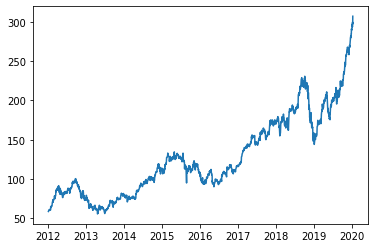

In [11]:
dates = pd.to_datetime(data['Date'])
plt.plot_date(dates,open_price,fmt='-')
plt.savefig("Bitcoin.jpg")

In [12]:
len(data)

2018

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [34]:
#Import dataset

#data_end = int(np.floor(1*(data.shape[0])))
data_end = 2018
#train = data[0:data_end]['Adj Close']
train = data[0:data_end]['Adj Close']
train =train.values.reshape(-1)
#test = data[data_end:]['Adj Close'].values.reshape(-1)
test = data[data_end:]['Adj Close'].values.reshape(-1)
date_test = data[data_end:]['Date'].values.reshape(-1)
print("Train size: ",train.shape)
print("Test size:",test.shape)

Train size:  (2018,)
Test size: (0,)


In [35]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train_set,test_set,30,1, dates)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,30)
y_train = x_train.reshape(-1,1)

x_train = scaler.fit_transform(train_set)
y_train = scaler.fit_transform(train_set)

# dua ve 0->1 cho tap test
#x_test = x_test.reshape(-1,30)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

x_test = scaler.fit_transform(test_set)
y_test = scaler.fit_transform(test_set)

date_test = date_test.reshape(-1,1)

In [99]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train,test,30,1, date_test)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,30)
y_train = y_train.reshape(-1,1)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

# dua ve 0->1 cho tap test
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

x_test = scaler.fit_transform(test)
y_test = scaler.fit_transform(y_test)

date_test = date_test.reshape(-1,1)

ValueError: ignored

In [46]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout,Dense
#dau vao 202 doan 1
n_input = 2018
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))


In [47]:
model.compile(optimizer='adam', loss='mse')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2018, 50)          10400     
                                                                 
 dropout (Dropout)           (None, 2018, 50)          0         
                                                                 
 lstm_1 (LSTM)               (None, 2018, 50)          20200     
                                                                 
 dropout_1 (Dropout)         (None, 2018, 50)          0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [49]:
history=model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/LSTM_Model/lstm_test')

Epoch 1/20


ValueError: ignored

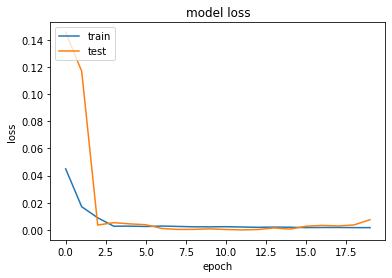

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

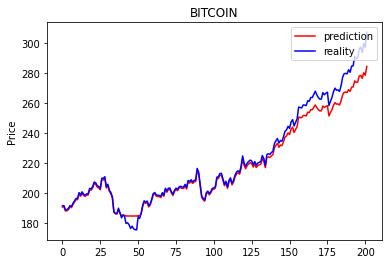

In [ ]:
import matplotlib.pyplot as plt
import keras
model = keras.models.load_model('/content/driver/My Drive/LSTM_Model/lstm_test')

test_output = model.predict(x_test)

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
plt.plot(test_1[:202], color='r')
plt.plot(test_2[:202] ,color='b')
plt.title("BITCOIN")
#plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [ ]:
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
print(test_1)
print(test_2)

[[190.71861]
 [190.87334]
 [188.01666]
 [188.20154]
 [189.02766]
 [190.84923]
 [190.29639]
 [192.46399]
 [194.00352]
 [195.65735]
 [195.6275 ]
 [199.489  ]
 [197.86943]
 [200.01105]
 [198.38362]
 [197.77048]
 [198.6405 ]
 [198.7195 ]
 [202.23929]
 [201.95534]
 [203.51942]
 [206.36676]
 [205.85336]
 [203.97766]
 [203.49016]
 [202.18056]
 [208.7975 ]
 [208.75905]
 [209.76685]
 [203.38283]
 [204.9313 ]
 [201.04329]
 [199.56784]
 [196.61995]
 [187.12714]
 [186.19926]
 [186.10399]
 [189.1083 ]
 [186.55313]
 [184.90968]
 [185.47006]
 [185.21564]
 [184.71912]
 [184.71912]
 [184.71912]
 [184.71912]
 [184.71912]
 [184.71912]
 [184.71912]
 [184.71912]
 [185.06995]
 [184.8488 ]
 [186.26733]
 [191.01997]
 [194.07338]
 [193.1644 ]
 [193.9137 ]
 [190.75377]
 [192.1134 ]
 [195.2594 ]
 [198.85771]
 [199.53827]
 [197.98816]
 [197.73088]
 [197.622  ]
 [196.96811]
 [199.45941]
 [197.86943]
 [202.28824]
 [200.5619 ]
 [202.39589]
 [202.46437]
 [199.97166]
 [198.38362]
 [200.9942 ]
 [202.42523]
 [201.58293]

In [ ]:
# Đánh giá mô hình
score = model.evaluate(x_test, y_test,verbose=1, batch_size = 30)
print('Test Score', score)

7/7 [==============================] - 1s 3ms/step - loss: 0.0020
Test Score 0.002030509989708662


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions= model.predict(x_test) 
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.045061
